Prueba

•	Diseñe y desarrolle un modelo y/o script que permita simular el siguiente caso real:
◦	Se tiene los datos de las provincias contigadas por COVID-19, los mismo que se encuentran en el siguiente link (https://public.flourish.studio/visualisation/1631922/?utm_source=showcase&utm_campaign=visualisation/1631922), estos datos estan disponibles en el Avac dentro del apartado Prueba – Practica, con estos datos obtener los siguientes modelos:


In [1]:
# Importar las librerias para el analasis
import pandas as pd
import numpy as np
from datetime import datetime,timedelta
from sklearn.metrics import mean_squared_error
from scipy.optimize import curve_fit
from scipy.optimize import fsolve
from sklearn import linear_model
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures


In [2]:
# Actualizar los datos (URL)

url = 'Casos covid por provincias.xlsx'

df = pd.read_excel(url)
df

,Provincia,16/3/2020,17/3/2020,18/3/2020,19/3/2020,20/3/2020,21/3/2020,22/3/2020,23/3/2020,24/3/2020,...,13/4/2020,14/4/2020,15/4/2020,16/4/2020,17/4/2020,18/4/2020,19/4/2020,20/4/2020,21/04/2020,22/04/2020
0,Azuay,1.0,5.0,5.0,14.0,18.0,19.0,19.0,23.0,28.0,...,182,192,200,205,207,217,223,232,247,273
1,Bolivar,0.0,0.0,2.0,2.0,4.0,5.0,8.0,9.0,9.0,...,33,33,33,39,39,45,49,54,55,59
2,Cañar,NaN,NaN,NaN,3.0,3.0,3.0,4.0,5.0,7.0,...,100,104,105,117,118,125,137,145,149,162
3,Carchi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,25,26,26,26,26,28,33,35,35,35
4,Chimborazo,NaN,NaN,NaN,2.0,3.0,4.0,9.0,9.0,11.0,...,85,86,90,99,105,108,112,116,121,124
5,Cotopaxi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,...,42,43,45,46,50,51,54,57,57,59
6,El Oro,NaN,1.0,1.0,1.0,2.0,2.0,6.0,9.0,14.0,...,160,166,183,193,207,247,257,266,276,289
7,Esmeraldas,NaN,NaN,NaN,NaN,NaN,2.0,2.0,3.0,3.0,...,38,41,44,53,85,86,89,102,102,104
8,Galápagos,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,...,11,12,11,11,42,53,54,54,54,54
9,Guayas,37.0,81.0,128.0,187.0,318.0,397.0,607.0,769.0,826.0,...,5395,5417,5551,5754,5777,6150,6446,6921,7108,7391


In [3]:
start_date = "16/3/2020"
province = df[df['Provincia'] == "Bolivar"]
infected = province.iloc[0].loc[start_date:]
infected

16/3/2020      0
17/3/2020      0
18/3/2020      2
19/3/2020      2
20/3/2020      4
21/3/2020      5
22/3/2020      8
23/3/2020      9
24/3/2020      9
25/3/2020     11
26/3/2020     11
27/3/2020     12
28/3/2020     14
29/3/2020     14
30/3/2020     14
31/3/2020     15
1/4/2020      20
2/4/2020      26
3/4/2020      26
4/4/2020      26
5/4/2020      27
6/4/2020      27
7/4/2020      27
8/4/2020      27
9/4/2020      30
10/4/2020     32
11/4/2020     33
12/4/2020     33
13/4/2020     33
14/4/2020     33
15/4/2020     33
16/4/2020     39
17/4/2020     39
18/4/2020     45
19/4/2020     49
20/4/2020     54
21/04/2020    55
22/04/2020    59
Name: 1, dtype: object

38

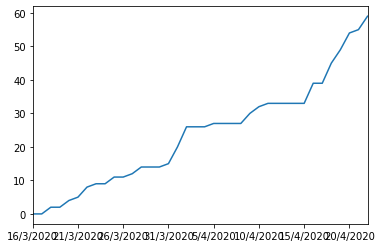

In [4]:
infected.plot(x ='date', y='total_cases')
len(infected)

## LINEAL

In [5]:
x = range(1,len(infected)+1) # Fecha
y = infected
# Creamos el objeto de Regresión Lineal
regr = linear_model.LinearRegression()
 
# Entrenamos nuestro modelo
regr.fit(np.array(x).reshape(-1, 1) ,y)

# Veamos los coeficienetes obtenidos, En nuestro caso, serán la Tangente
print('Coefficients: \n', regr.coef_)
# Este es el valor donde corta el eje Y (en X=0)
print('Independent term: \n', regr.intercept_)
# Error Cuadrado Medio

Coefficients: 
 [1.41973958]
Independent term: 
 -3.9217638691322954


In [6]:
#Vamos a comprobar:
# Quiero predecir cuántos "Casos" voy a obtener por en el dia 100,
# según nuestro modelo, hacemos:
y_prediccion = regr.predict([[len(infected)+7]])
print(int(y_prediccion))

59


[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44]


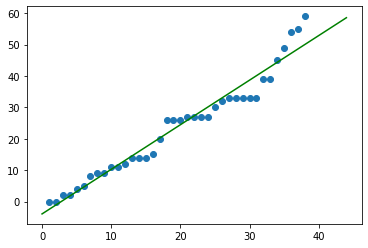

In [7]:
#Graficar
plt.scatter(x, y)
x_real=np.array(range(0, len(infected)+7))
print(x_real)
plt.plot(x_real, regr.predict(x_real.reshape(-1, 1)), color='green')
plt.show()

## Logistico

In [8]:
def modelo_logistico(x,a,b):
    return a+b*np.log(x)

exp_fit = curve_fit(modelo_logistico,x,y) #Extraemos los valores de los paramatros
print(exp_fit)

(array([-19.94397257,  16.12994089]), array([[18.77584457, -6.29772319],
       [-6.29772319,  2.32414943]]))


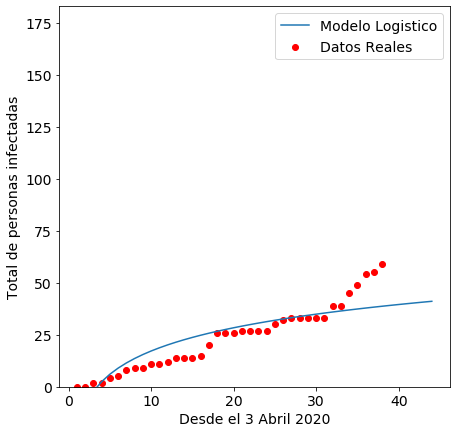

In [9]:
pred_x = list(range(min(x),max(x)+7)) # Predecir 50 dias mas
plt.rcParams['figure.figsize'] = [7, 7]
plt.rc('font', size=14)
# Real data
plt.scatter(x,y,label="Datos Reales",color="red")
# Predicted exponential curve
plt.plot(pred_x, [modelo_logistico(i,exp_fit[0][0],exp_fit[0][1]) for i in pred_x], label="Modelo Logistico" )
plt.legend()
plt.xlabel("Desde el 3 Abril 2020")
plt.ylabel("Total de personas infectadas")
plt.ylim((min(y)*0.9,max(y)*3.1)) # Definir los limites de Y
plt.show()

## Exponencial

In [10]:
infected = list(infected)
lista=[]
for i in range(1,len(infected)+1):
    lista.append(i)
n=len(lista)

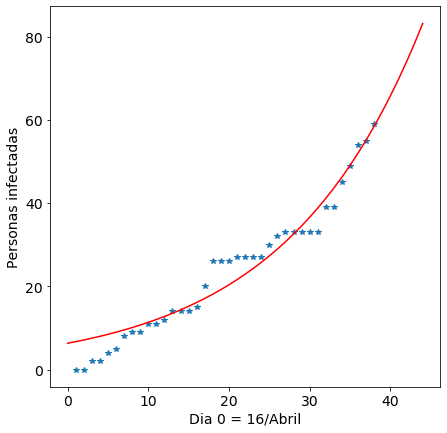

In [11]:
n = len(infected)
x = np.array(range(1,n+1))
y = np.array(infected)

from scipy.optimize import curve_fit
def exponencial (x,a,b):
    return a * np.exp(-b * x-0)

r=curve_fit(exponencial, x, y)
x_pred=np.array(range(0,len(infected)+7))
plt.figure()
plt.plot(x,y,'*',label="Valores reales")
plt.plot(x_pred, [exponencial(i,r[0][0],r[0][1]) for i in x_pred], 'r-', label="Prediccion")
plt.xlabel("Dia 0 = 16/Abril")
plt.ylabel("Personas infectadas")
plt.legend
plt.show()


## Polinomial

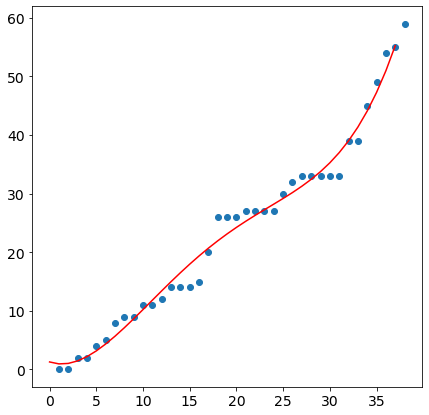

In [12]:
pred={}
for g in range(0,5):
    z = np.polyfit(x, y, g, full=True)
    pred[g]=z
    
xnuevo = np.array(range(0,len(infected)))

for g,predi in pred.items():
    coefs, error, *_ = predi
    p = np.poly1d(coefs)

plt.scatter(x,y)
plt.plot(xnuevo, p(xnuevo),"r-")

## SIR

In [13]:
import numpy as np
import pandas as pd
from csv import reader
from csv import writer
from scipy.integrate import solve_ivp
from scipy.optimize import minimize
import matplotlib.pyplot as plt
from datetime import timedelta, datetime
import argparse
import sys
import json
import ssl
import urllib.request



class Learner(object):
    def __init__(self, country, loss, start_date,s_0, i_0, r_0):
        self.country = country
        self.loss = loss
        self.start_date = start_date
        self.s_0 = s_0
        self.i_0 = i_0
        self.r_0 = r_0
    
    def train(self):
        #data = (self.load_confirmed(self.country))
        data = y
        #self.i0=data[-1]
        optimal = minimize(loss, [0.001, 0.001],
                           args=(data, self.s_0, self.i_0, self.r_0),
                           method='L-BFGS-B',
                           bounds=[(0.00000001, 0.26),
                                   (0.00000001, 0.163)])
        beta, gamma = optimal.x
        self.Beta, self.Gamma = optimal.x
        #new_index, extended_actual, prediction = self.predict(beta, gamma, data, self.country, self.s_0, self.i_0, self.r_0)
            #df = pd.DataFrame({'Infected': extended_actual,
                               #'Susceptible de infeccion': prediction.y[0], 
                               #'Recovered': prediction.y[2]},
                              #index=new_index)
        
        print(beta,gamma)
        print(str(beta/gamma))
        #print(f "\n beta={beta:.8f},gamma={gamma:.8f}, R0:{(beta/gamma):.8f}")
            


def loss(point, data, s_0, i_0, r_0):
    size = len(data)
    beta, gamma = point
    def SIR(t, y):
        S = y[0]
        I = y[1]
        R = y[2]
        return [-beta*S*I, beta*S*I-gamma*I, gamma*I]
    solution = solve_ivp(SIR, [0, size], [s_0,i_0,r_0], t_eval=np.arange(0, size, 1), vectorized=True)
    return np.sqrt(np.mean((solution.y[1] - data)**2))

N=80000
i_0=2
r_0=0
s_0=N -i_0 - r_0
print('S0:',s_0,'\tI0:',i_0,'\tR0:',r_0)
learner = Learner('Bolivar', loss, '3/16/2020', s_0, i_0, r_0)
learner.train()

S0: 79998 	I0: 2 	R0: 0
0.26 0.163
1.5950920245398772


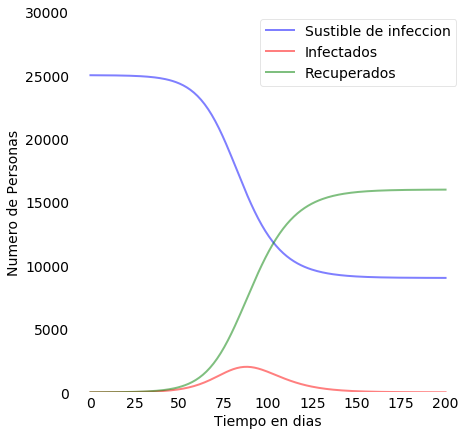

In [14]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Total de la poblacion
N = 25000
# Numero Inicial de Infectados
I0 = 2
# Numero de Recuperados
R0 = 0
# Todos los demás, S0, son susceptibles a la infección inicialmente.
S0 = N - I0 - R0
# Tasa de contacto, beta (nivel de repoductividad del virus) 
# La tasa de recuperación media, gamma,(1/días) Una persona se recupera en 15 dias.
beta, gamma = 0.26, 0.163 
# Una cuadrícula de puntos de tiempo (en días)
t = np.linspace(0, 200, 200)


# Las ecuaciones diferenciales del modelo SIR..
def deriv(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N 
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

# Vector de condiciones iniciales
y0 = S0, I0, R0
# Integre las ecuaciones SIR en la cuadrícula de tiempo, t. A traves de la funcion odeint()
ret = odeint(deriv, y0, t, args=(N, beta, gamma))
S, I, R = ret.T # Obtenicion de resultados


#  Trace los datos en tres curvas separadas para S (t), I (t) y R (t)
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111,  axisbelow=True)
ax.plot(t, S, 'b', alpha=0.5, lw=2, label='Sustible de infeccion')
ax.plot(t, I, 'r', alpha=0.5, lw=2, label='Infectados')
ax.plot(t, R, 'g', alpha=0.5, lw=2, label='Recuperados')
ax.set_xlabel('Tiempo en dias')
ax.set_ylabel('Numero de Personas')
ax.set_ylim(0,N*1.2)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()


In [15]:
Ro = beta/gamma
print(Ro)

1.5950920245398772


In [ ]:
from random import randrange # Obtener un numero randomico
import pygame

#Parametros de inicio
PROBA_MUERTE = 8.4  # Probabilidad de que la gente muera COVID
CONTAGION_RATE = 1.5950920245398772  # Factor R0 para la simulacion COVID probabilidad
PROBA_INFECT = CONTAGION_RATE * 10
PROBA_VACU = 0 # Probabilidad de que exista una vacuna, COVID = 0
SIMULACION_SPEED = 50 # Tiempo de un dia en milisegundos (Cada 25 es un dia)
nb_rows = 50 #Numero de filas
nb_cols = 50 #Numero de columnas

global display, myfont, states, states_temp #Declaracion de variables globales

#Declaro colores en formato RGB
WHITE = (255, 255, 255) 
BLUE = (0, 0, 255)
GREEN = (0, 247, 0)
BLACK = (0, 0, 0)

#Obtiene los vecinos dado un punto x,y
def get_vecinos(x, y):
    incx = randrange(3)
    incy = randrange(3)
    incx = (incx * 1) - 1
    incy = (incy * 1) - 1
    x2 = x + incx
    y2 = y + incy
    #Validar limites
    if x2 < 0:
        x2 = 0
    if x2 >= nb_cols:
        x2 = nb_cols - 1
    if y2 < 0:
        y2 = 0
    if y2 >= nb_rows:
        y2 = nb_rows - 1
    return [x2, y2] # Nuevos contagiados

#Genero las personas que cuentan con `inmunidad o vacuna 
def vacunar():
    for x in range(nb_cols):
        for y in range(nb_rows):
            if randrange(99) < PROBA_VACU:
                states[x][y] = 1

#Funcion que permite contar el numero de muertosde la matriz states == -1
def contar_muertes():
    contador = 0
    for x in range(nb_cols):
        for y in range(nb_rows):
            if states[x][y] == -1:
                contador +=  1
    return contador

#Definimos datos de inicio
states = [[0] * nb_cols for i1 in range(nb_rows)]
states_temp = states.copy()
states[randrange(50)][randrange(50)] = 10 # Estado inicial de la simulacion Posicion del Infectado
it = 0 # Variable para contar las Iteraciones
total_muerte = 0 # Contabiliza el numero de muertos
vacunar() #Llamar a la funcion vacunar

pygame.init() #Incializo el motor de juegos pygame
pygame.font.init() #Inicializo el tipo de letra
display=pygame.display.set_mode((1280,900),0,32) #Tamanio de la ventana
pygame.display.set_caption("Simulacion de Epidemia Covid-19 Ecuador")# Titulo
font=pygame.font.SysFont('Calibri', 40) # Tipo de letra
display.fill(WHITE) # Color de fondo

while True:
    pygame.time.delay(SIMULACION_SPEED) # Sleep o pausa
    it = it + 1
    if it <= 10000 and it >= 2:
        states_temp = states.copy() #Copia de la matriz
        #Recorrera la matriz
        for x in range(nb_cols):
            for y in range(nb_rows):
                state = states[x][y]
                if state == -1:
                    pass
                if state >= 10: # Numero de dias de contagio
                    states_temp[x][y] = state + 1
                if state >= 20:
                    if randrange(99) < PROBA_MUERTE: # Genero un randomico para verificar si fallece o se recupera
                        states_temp[x][y] = -1 # Muere
                    else:
                        states_temp[x][y] = 1 # Cura o recupera
                if state >= 10 and state <= 20: # Rango de infectado
                    if randrange(99) < PROBA_INFECT: # Infecto a las personas cercanas entre  10 y 20 
                        neighbour = get_vecinos(x, y) #Obtenemos los vecinos a contagiar
                        x2 = neighbour[0]
                        y2 = neighbour[1]
                        neigh_state = states[x2][y2]
                        if neigh_state == 0: #Verifico que este sano
                            states_temp[x2][y2] = 10 # Contagia
        states = states_temp.copy()
        total_muerte = contar_muertes() # contar el numero de muertos
        
    pygame.draw.rect(display, WHITE, (400, 30, 400, 50)) # Grafico el fondo
    textsurface = font.render("Total muertes: "+ str(total_muerte), False, (255,160,122)) #El numero de muertos
    display.blit(textsurface, (250, 30)) # Graficar el texto de muertes
    #Graficar el estado del paciente matriz
    for x in range(nb_cols):
        for y in range(nb_rows):
            if states[x][y] == 0:
                color = BLUE # No infectado
            if states[x][y] == 1:
                color = GREEN # Recupero
            if states[x][y] >= 10:
                color = (states[x][y] * 12, 50, 50) # Injectado - Rojo
            if states[x][y] == -1:
                color = BLACK # Muerto
            pygame.draw.circle(display, color, (50 + x * 5 + 5, 20 + y * 5 + 5), 2)
            pygame.draw.rect(display, WHITE, (20 + x * 12 + 3, 20 + y * 12 + 4, 1, 1))
    #Escuachar los eventos del teclado
    for event in pygame.event.get():
        if event.type == pygame.KEYDOWN and event.key == pygame.K_ESCAPE: #Presiona y Escape
            pygame.quit() #Termino simulacion
        if event.type == pygame.KEYDOWN and event.key == pygame.K_SPACE: #Presiona y espacio
            #Reiniciamos valores
            states = [[0] * nb_cols for i1 in range(nb_rows)]
            states_temp = states.copy()
            states[5][5] = 10
            it = 0
            total_muerte = 0
            vacunar() #Llamar a la funcion vacunar
            
    pygame.display.update()# Mandar actualizar la ventana

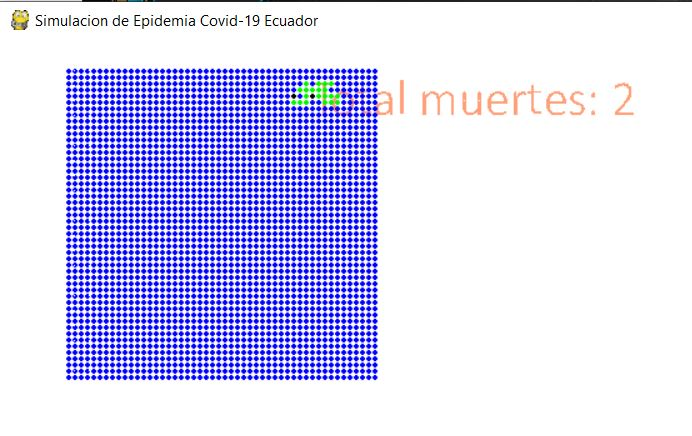

## Ventajas y desventajas acerca de los modelos

El **modelo Lineal** muestra un crecimiento de infección que se detendrá en el futuro, es menos propenso al ajuste, es decir que no se ajusta a modelos no lineales y no tiene mucha información

EL **modelo Logístico** es una técnica de aprendizaje automático, no permite aplicar problemas de regresión, es usado gracias a su simplicidad por los científicos, no es necesario disponer de grandes recursos computacionales. Es imposible resolver problemas no lineales.

**Modelo Exponencial** Permite describir un crecimiento de infección imparable, es bastante usada para predecir virus, con el crecer de la curva se aleja de los resultados

**Modelo Polinomial** es el mejor modelo para predecir la curva de infección según los datos, lo malo es que requiere elegir el grado correcto del polinomio para producir una buena relación, y se hace más complejo confirme aumenta el grado de predicción.


En conclusión, la mejor predicción la realiza el modelo polinomial ya que se ajusta al comportamiento de los datos obtenidos.